<a href="https://colab.research.google.com/github/MeledjeLaroche/Deep_Learning_courses/blob/main/Deep_introduction_inphb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Devoir de maison n° 1

Le but de ce devoir est de parcourir de façon succinte le cycle complet de développement d'un modèle de deep learning afin de résoudre un problème concret. </br></br>


Réfléchissez à un problème se rapportant à la classification d’images en différentes catégories. Veuillez y penser dès maintenant. Je vous encourage à observer attentivement autour de vous pour identifier un problème concret où votre solution aura une plus-value !  </br> 
Rappelons que vous n’êtes pas limité à un problème à deux classes, vous pouvez aller plus loin, 3, 4 ou plus. Libérez votre créativité personnelle, j’insiste sur la personnalisation. Veuillez privilégier le développement de votre propre expertise.</br>
*N'oubliez surtout pas, ceux qui montreront un effort dans leur travail pourront travailler sur des projets de recherche financés avec moi !* 

Veillez indiquer le problème à résoudre choisi:</br>
**<b>Projet de classification des fruits et légumes pour aider les enfants à apprendre à reconnaitre les fruits des légumes</br>**

###### Auteur : AGNIMEL Mélèdje R. Guy Laroche 
(IDSI Master 2 Data science Big data et Intelligece artificielle)

###  Installation des librairies

In [ ]:
# Installation des librairies nécessaires

!pip install -Uqq  timm # plus grande librairies de modèles de vision (271!)
!pip install -Uqq fastai
!pip install -Uqq fastbook

import timm, fastai, fastbook
fastai.__version__, fastbook.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 21.7 MB/s eta 0:00:00


('2.7.10', '0.0.29')

### Importation des librairies 

In [ ]:
# Code pour importer les modules de vision et fastbook
from fastai.vision.all import *
from fastbook import *

## **I. Développement du jeu de données**



### Collecte d'urls des données


1. Modifier le code du notebook vu au cours de sorte à collecter 300 url d’images pour chacune des catégories ou classes de votre problème.


2. Diviser la liste d’urls de chaque catégorie en **2 listes disjointes**: une liste de 200 urls et une autre de 100 urls. Utiliser le préfixe 'extra' pour ces listes de 100 urls. Par exemple, pour le notebook du cours on aura: *urls_bagarre, urls_non_bagarre, extra_urls_bagarre, extra_urls_non_bagarre*

</br>


In [ ]:
# Ecrivez votre code ici
# Ecrivez votre code ici
n_images = 200
urls_fruit = search_images_ddg('only fruits', max_images=n_images)
urls_vegetable = search_images_ddg('only vegetables', max_images=n_images)

In [ ]:
# Dé-commentez les lignes de code suivantes, modifiez-les pour réfléter
# vos noms utilisés et le nombre de catégorie de votre problème,
# et exécutez. Aucune erreur ne doit apparaître sinon
# les listes ne sont pas disjointes comme indiqué!
urls_fruits = urls_fruit[:100]
extra_urls_fruits= urls_fruit[100:]

urls_vegetables = urls_vegetable[:100]
extra_urls_vegetables = urls_vegetable[100:]

assert(len(set(urls_fruits) & set(extra_urls_fruits)) == 0) 
assert(len(set(urls_vegetables) & set(extra_urls_vegetables)) == 0)

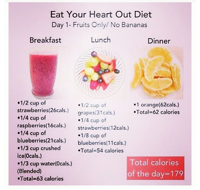

Image de fruit


In [ ]:
imm3 = 'fruit.jpg'
download_url(urls_fruits[0], imm3, show_progress=True)
im = Image.open(imm3)
display(im.to_thumb(200,200))
print('Image de fruit')

### Téléchargement et  Visualisation de quelques données des différentes catégories

En vous basant sur le notebook vu en cours, téléchargez les données en respectant leur organisation par dossier en supprimant les fichiers corrompus

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Ecrivez le chemin vers le dossier de votre Gdrive où seront
# en sauvgardées les données
folder ="/content/drive/MyDrive/Colab Notebooks/Dev_DeepL"

Mounted at /content/drive


In [ ]:
root = Path(folder+'/Apprent')
# Ecrivez votre code pour le téléchargement des données dans
# le dossier 'data/train'
paths =[root/'fruits', root/'vegetables']
# Liste des urls collectées de chaque catégorie
class_urls = [urls_fruits, urls_vegetables]

for path, urls in zip(paths, class_urls):
    path.mkdir(exist_ok=True, parents=True)
    download_images(path, urls=urls)
    print(f"Nombre d'images dans {path}: {len(path.ls())}")

Nombre d'images dans /content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/fruits: 94
Nombre d'images dans /content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/vegetables: 91


In [ ]:
root_extra = Path(folder+'/extra')
# Ecrire la suite de code pour télécharger
# les images référencées par les listes `extra_urls_...` 
# dans les sous-dossiers dédiés à chaque catégorie
paths_extra =[root_extra/'fruits', root_extra/'vegetables']
# Liste des urls collectées de chaque catégorie
class_urls_extra = [extra_urls_fruits, extra_urls_vegetables]

for path, urls in zip(paths_extra, class_urls_extra):
    path.mkdir(exist_ok=True, parents=True)
    download_images(path, urls=urls)
    print(f"Nombre d'images dans {path}: {len(path.ls())}")

Nombre d'images dans /content/drive/MyDrive/Colab Notebooks/Dev_DeepL/extra/fruits: 96
Nombre d'images dans /content/drive/MyDrive/Colab Notebooks/Dev_DeepL/extra/vegetables: 90


In [ ]:
root = Path(folder+'/Apprent')
root_extra = Path(folder+'/extra')

* Ceci est dû au fait que la session a été relancé sous colab suite à plusiseurs interruptions


**Pour la suite, utilisez uniquement le dossier `train/`**</br>

Créez un dataloader à partir des données du dossier `train/`, puis en visualisez un lot.


In [ ]:
# Ecrivez votre code pour la suppression d'images corrompues
corrupted_images = verify_images(get_image_files(root))
corrupted_images.map(Path.unlink)
print("Nombres d'images corrompus est {}".format(len(corrupted_images)))

Nombres d'images corrompus est 5


In [ ]:
# Ecrivez votre code pour la suppression d'images corrompues
corrupted_images = verify_images(get_image_files(root_extra))
corrupted_images.map(Path.unlink)
print("Nombres d'images corrompus est {}".format(len(corrupted_images)))

Nombres d'images corrompus est 4


(Path('/content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/fruits/c4d3253e-9d27-4b17-b586-3a9a9606ee84.jpg'), 'fruits')


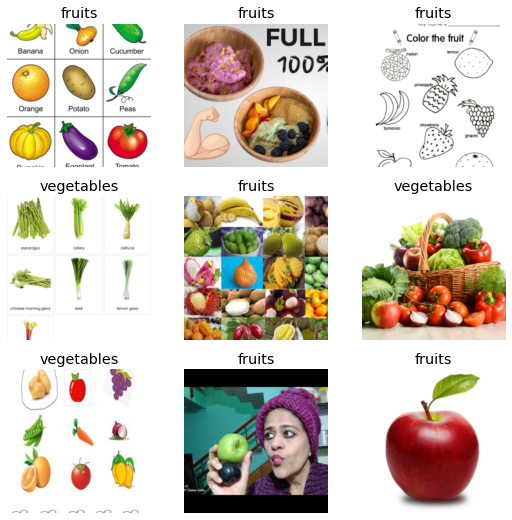

In [ ]:
# Ecrivez votre code pour la création de dataloader et 
# visualisation d'un lot de données
fnames = get_image_files(root)

def label_function(x): return x.parent.name

print(f"{fnames[0], label_function(fnames[0])}")

dls = ImageDataLoaders.from_path_func(root, fnames, label_function,
                                     valid_pct=0.2, seed=12, bs=60,
                                     item_tfms=Resize(224))

dls.show_batch()

## **II. Développement de modèles en réponse au problème**

1. Entraîner 4 modèles (`resnet50, resnext50_32x4d, xresnet50, efficientnet_b2`) pendant 5 époques en utilisant la technique de l'apprentissage par transfert vu en cours

In [ ]:
training_time = {}
training_perf = {}


In [ ]:
# Ecrivez votre code pour entraîner le resnet50
# utilisez le nom `learn_r50`
from fastai.vision import *
from fastai.metrics import error_rate

learn_r50 =  vision_learner(dls, resnet50, metrics=error_rate, pretrained=False)
learn_r50.fine_tune(5)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.464076,1.940768,0.555556,00:16


epoch,train_loss,valid_loss,error_rate,time
0,2.303146,0.949778,0.444444,00:10
1,1.730444,1.680253,0.555556,00:10
2,1.517055,2.347927,0.555556,00:08
3,1.434751,1.757432,0.555556,00:09
4,1.411733,1.735935,0.555556,00:10


In [ ]:
learn_r50.save('m-r50')

Path('/content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/models/m-r50.pth')

In [ ]:
# Ecrivez votre code pour entraîner le resnext50_32x4d
# utilisez le nom `learn_rx50`
learn_rx50 =  vision_learner(dls, resnext50_32x4d, metrics=error_rate, pretrained=False)
learn_rx50.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.462960,1.538327,0.444444,00:08


epoch,train_loss,valid_loss,error_rate,time
0,2.010761,2.409393,0.555556,00:11
1,1.615980,1.237415,0.444444,00:09
2,1.440441,0.760889,0.555556,00:08
3,1.309122,0.710779,0.555556,00:10
4,1.270596,0.727790,0.444444,00:09


In [ ]:
# training_time['resnext50_32x4d'] = 
#training_perf['resnext50_32x4d'] = learn_rx50.validate()[1]

In [ ]:
learn_rx50.save('m-rx50')

Path('/content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/models/m-rx50.pth')

In [ ]:
# Ecrivez votre code pour entraîner le xresnet50
# utilisez le nom `learn_xr50`
learn_xr50 =  vision_learner(dls, xresnet50, metrics=error_rate, pretrained=False)
learn_xr50.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.214032,0.817194,0.444444,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.575518,0.762418,0.472222,00:11
1,1.284973,1.112652,0.444444,00:08
2,1.142049,1.560909,0.444444,00:09
3,0.992680,1.641265,0.444444,00:10
4,0.915382,1.693626,0.444444,00:08


In [ ]:
# training_time['learn_xr50'] = 
#training_perf['learn_xr50'] = learn_xr50.validate()[1]

In [ ]:
learn_xr50.save('m-xr50')

Path('/content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/models/m-xr50.pth')

In [ ]:
# Ecrivez votre code pour entraîner le efficientnet_b2
# utilisez le nom `learn_efnb2`
learn_efnb2 =  vision_learner(dls, efficientnet_b2, metrics=error_rate, pretrained=False)
learn_efnb2.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.305755,0.798314,0.444444,00:09


epoch,train_loss,valid_loss,error_rate,time
0,2.645277,0.872755,0.555556,00:10
1,1.899870,0.691779,0.444444,00:07
2,1.645323,0.697308,0.444444,00:10
3,1.502951,0.706966,0.555556,00:08
4,1.405330,0.730987,0.555556,00:09


In [ ]:
# training_time['learn_efnb2'] = 
#training_perf['learn_efnb2'] = learn_efnb2.validate()[1]

In [ ]:
learn_efnb2.save('m-efnb2')

Path('/content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/models/m-efnb2.pth')

## **II.1 Analyse des modèles développés**

1. Créez une variable `training_time` de type `dictionnaire` ayant pour clés les chaînes de </br>caractères (string) des noms des 5 modèles  et pour valeurs le temps total mis pour l'entraînement (voir colonne 'time' de l'output des entraînements effectués).
2. Faites de même pour les performances (`error_rate`) avec une variable `training_perf`.

In [ ]:
training_time = {}
training_perf = {}

In [ ]:
# Code pour remplir chaque dictionnaire comme indiqu
# le temps ici est indiqué en minutes
training_time['resnet50'] = 47
training_perf['resnet50'] = 0.555556
training_time['resnext50_32x4d'] = 47
training_perf['resnext50_32x4d'] = 0.444444
training_time['xresnet50'] = 46
training_perf['xresnet50'] = 0.444444
training_time['efficientnet_b2'] = 44
training_perf['efficientnet_b2'] = 0.555556

**Bonus**:

- Faites un diagramme à bandes avec la librairie `matplotlib`
avec en abscisse les noms des modèles et en ordonnée le temps
d'apprentissage ou entraînement

- Faites-en de même pour la performance des modèles


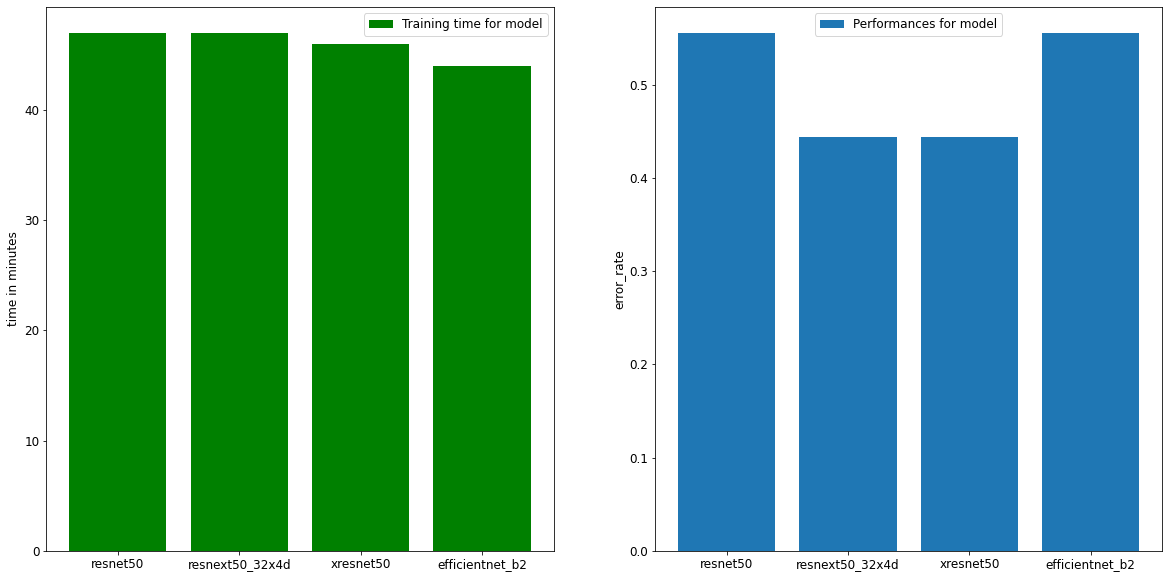

In [ ]:
# Code pour les graphes
# En tant que data scientist, il est indispensable
# de présenter les résultats sous forme de graphes
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.bar(list(training_time.keys()), list(training_time.values()),color='green')
plt.ylabel("time in minutes")
plt.legend(["Training time for model"])

plt.subplot(1, 2, 2)
plt.bar(list(training_perf.keys()), list(training_perf.values()))
plt.ylabel("error_rate")
plt.legend(["Performances for model"])
plt.show()

3. Quel est le modèle le plus rapide pour l'entraînement ?</br>

`Le modèle le plus rapide est efficientnet_b2 ici`
</br>

4. Quel est le modèle le plus performant?</br>

`Le modèle le plus performant est resnet50`
</br>

<!-- 5. Basé sur ces résultats, quel est l'impact du nombre de couches en profondeur </br>sur le temps d'apprentissage ? A partir de votre compréhension du cours,</br> qu'est ce qui selon vous justifie cela ?</br>

`<Remplacez-moi par votre réponse>`
</br>

6. Même questions pour la performance.</br>

`<Remplacez-moi par votre réponse>`
</br> -->



## **II.2 Amélioration du modèle le plus performant**

Vous allez entraîner davantage le modèle le plus performant jusqu' à la
dégradation de la performance.

In [ ]:
# Adaptez le code ci-dessous
best_model =  vision_learner(dls, resnet50 , metrics=error_rate, pretrained=False)
n_epochs = 40
best_model.fine_tune(n_epochs)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.427380,1.444017,0.555556,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.484490,1.114068,0.444444,00:10
1,1.342471,1.504323,0.444444,00:09
2,1.188734,0.693177,0.583333,00:10
3,1.144871,1.072251,0.555556,00:10
4,1.095834,0.677765,0.416667,00:08
5,1.114668,1.309747,0.444444,00:10
6,1.107131,1.145237,0.444444,00:09
7,1.101684,0.790936,0.583333,00:08
8,1.072463,0.883262,0.555556,00:12
9,1.055642,0.685035,0.388889,00:09


Notez le numéro de l'époque avant laquelle la
performance a une tendance globale à se dégrader.</br>
Mettre sa valeur dans la variable ci-dessous



In [ ]:
best_model.save("best_modelr50")

Path('/content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/models/best_modelr50.pth')

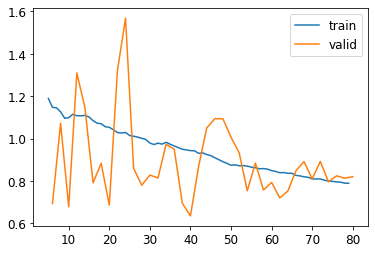

In [ ]:
best_model.recorder.plot_loss()

In [ ]:
n_epoch_best_perf = 19

## **III. Evaluation finale**

La meilleure version de votre modèle est maintenant prête à l'emploi dans la vie courante pour résoudre le
problème pour lequel il a été développé. On parle de déploiement.

Nous simulerons ce déploiement en usage réel en
le testant sur les données `extra` qui n'ont eu aucun lien avec tout le processus d'apprentissage.


In [ ]:
# Collection des fichiers images
fnames_extra =  get_image_files(root_extra)
# Détermination de leur label
labels = [label_function(x) for x in fnames_extra]

In [ ]:
# Ecrire le code pour calculer les prédictions de toutes 
# les images du dossier `extra` en vous basant sur le notebook

predictions = []
for image in fnames_extra:
  preds,_,probs = best_model.predict(image)
  predictions.append(preds)


In [ ]:
# Calculer le nombre d'images dont les labels sont égaux
# à leurs prédictions puis déduire la pourcentage de prédictions correctes
# `accuracy` et le taux d'erreur `error_rate`
#....
# print(f"Pourcentage prédictions correctes: {accuracy}")
# print(f"Taux d'erreurs : {error_rate}")

num_correct = 0
for i in range(len(labels)):
  if predictions[i] == labels[i]:
    num_correct = num_correct + 1

num_total = len(labels)
accuracy = num_correct / num_total
error_ra = 1 - accuracy

print(f"Pourcentage prédictions correctes: {accuracy}")
print(f"Taux d'erreurs : {error_ra}")


Pourcentage prédictions correctes: 0.5384615384615384
Taux d'erreurs : 0.46153846153846156


Finalement, vous allez entrainer votre modèle sur l'ensemble des données du dossier `'data/train'` sans en mettre de côté pour la validation.
Pour cela, vous allez redéfinir le dataloader dls avec le paramètre `valid_pct=1/n` (n est le nombre total d'images téléchargées) ce qui
correspond à mettre une seule image dans l'ensemble de validation car fastai nous oblige à en avoir un. 

In [ ]:
vpct = 1/len(fnames)
dls = ImageDataLoaders.from_path_func(root, fnames, label_function,
                                     valid_pct=vpct, seed=121, bs=80,
                                     item_tfms=Resize(200))

In [ ]:
# Ecrire le code pour re-entraîner le modèle
# avec le nombre d'époques notée précédemment
# Adaptez/Modifiez le code ci-dessous
optimodel = vision_learner(dls, resnet50 , metrics=error_rate, pretrained=False)
optimodel.fine_tune(n_epoch_best_perf)

epoch,train_loss,valid_loss,error_rate,time
0,1.363011,2.485413,1.000000,00:08
1,1.402288,0.277331,0.000000,00:10
2,1.300251,0.430014,0.000000,00:07
3,1.213332,3.528489,1.000000,00:10
4,1.145619,2.233339,1.000000,00:08
5,1.111390,2.504327,1.000000,00:09
6,1.086822,1.319194,1.000000,00:10
7,1.079645,1.550454,1.000000,00:09
8,1.041263,3.036049,1.000000,00:09
9,1.014680,2.168196,1.000000,00:11


In [ ]:
optimodel.save("optimodelr")

Path('/content/drive/MyDrive/Colab Notebooks/Dev_DeepL/Apprent/models/optimodelr.pth')

In [ ]:
predictions_finales=[]
for image in fnames_extra:
  preds,_,probs = optimodel.predict(image)
  predictions_finales.append(preds)


In [ ]:
# Calculer le nombre d'images dont les labels sont égaux
# à leurs prédictions puis déduire la pourcentage de prédictions correctes
# `accuracy_final` et le taux d'erreur `error_rate_final`
#....
# print(f"Pourcentage prédictions correctes: {accuracy_final}")
# print(f"Taux d'erreurs : {error_rate_final}")

num_correct = 0
for i in range(len(labels)):
  if predictions_finales[i] == labels[i]:
    num_correct = num_correct + 1

num_total = len(labels)
accuracy = num_correct / num_total
error_ra = 1 - accuracy

print(f"Pourcentage prédictions correctes: {accuracy}")
print(f"Taux d'erreurs : {error_ra}")


Pourcentage prédictions correctes: 0.5164835164835165
Taux d'erreurs : 0.48351648351648346


Comparez les performances entre ce modèle et le précédent.
Quel est le plus performant ?

`Le modèle le plus performant est celui du précédent avec 54% de précision contre 52%`

Comparez la performance de ce modèle à la meilleure performance sur
l'ensemble de validation de la section II.2. Quel est le plus performant ?

Le modèle le plus performant est celui ci avec 54% de précision, meilleure par rapport à celui-ci


**Félicitations ! Vous venez de parcourir le cycle `basique` de développement d'un modèle prêt à l'emploi ! Il y a encore beaucoup d'autres ingrédients manquants mais le schéma global y est.**


